<img src="https://www.inf.utfsm.cl/images/slides/Departamento-de-Informtica_HORIZONTAL.png" title="Title text" width="80%" />

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales I-2021 </h1>

<H3 align='center'> Tarea 3 - Redes Neuronales y Deep Learning </H3>
<hr style="height:2px;border:none"/>


# **Temas**  

* Redes Neuronales Recurrentes.
* Modelos Generativos.
* Autoencoders.
* Modelos Especiales.

****

# **Formalidades**  

* Equipos de trabajo de 3 personas.
* Formato de entrega: envı́o de Jupyter notebook y link de video Youtube o plataforma a convenir, todo esto vía Aula. 
* Cada persona debe estar en condiciones de realizar una presentación del trabajo realizado por su equipo y responder preguntas sobre el mismo. El día de la defensa oral serán seleccionados 4-5 presentadores aleatoriamente de entre la clase.
* La tarea tiene 2 partes: una pregunta de investigación donde se evalúa la metodología adoptada y un competencia donde pesa más el resultado y el ranking obtenido. 
* Fecha de Entrega de Código: Viernes 06 de Agosto de 2021 23:59:00 Hrs. (Se pueden cargar nuevas versiones hasta el Sábado 10 de Agosto 23:59:00 Hrs.).
* Fecha de Defensa Oral: Viernes 06 de Agosto de 2021 en horario de clases.
* Fecha de Entrega de Video: Sábado 7 de Agosto de 23:59:00 Hrs.

<hr style="height:2px;border:none"/>


# **Entregables**

* Se debe entregar el código utilizado en formato Jupyter/IPython notebook para poder **reproducir los resultados** presentados. El notebook debe estar ordenado para permitir identificar las celdas que a cada parte de la tarea y a las partes más importantes del desarrollo realizado. 

* Se debe preparar un video de **15 a 20 minutos** donde se explique cómo se abordó el taller. En el caso de la pregunta de investigación, se debe explicar muy bien (1) la metodología a utilizar (datasets considerados, pre-procesamiento de datos, arquitecturas a evaluar, parámetros a variar, parámetros a mantener constantes, métricas con las que se evaluará el resultado, etc.), (2) los resultados obtenidos y (3) las conclusiones de la experiencia. En el caso del desafío, se debe narrar brevemente la estrategia de solución adoptada enfocándose en aquello que los autores creen que la hará la solución ganadora. 



****


# Taller 2 Sansanos Overfitted


*   Felipe Cisternas, 201873022-K
*   Lucas Galindo,    201873004-1

###Contribucion Lucas Galindo:
Visualización y preparación de datos del desafio, elaboración modelo desafio, encargado de las predicciones y submisiones a kaggle y binario


###Contribucion Felipe Cisternas: 
Busqueda de los datasets para la pregunta de investigacion, desarrollo de los modelos convolucionales y recurrentes y elaboracion de las conclusiones de la investigacion.



## Informe Binario School


1.   ¿Recomendarían participar en este tipos de desafíos a otros compañeros?:

 Si, siempre participar en un desafio ya sea en kaggle o Binario u otra plataforma es muy recomendable, sobre todo para aprender experimentando directamente desarollando modelos predictivos, y no solo quedarse en la teoria.
2.   ¿Participarían en una competencia abierta de este tipo (machine learning)?:

  Si, al final lo importante es poder compartir y aprender entre todos, en este tipo de competencias uno aprende muchas cosas para aplicarlas a futuros proyectos.
3.   ¿Qué fue lo que más me gustó de la experiencia binnario School?:

  lo que mas nos gusto fue que la plataforma es muy intuitiva y facil de utilizar
4.   ¿Qué fue lo que menos me gustó de la experiencia binnario School?:

  Una de las cosas que menos nos gusto fue que haya que utilizar una cuenta por equipo y no se puedan crear ni merger equipos para que cada integrante utilice su propia cuenta

  La sección de información del desafio es algo "agobiante", hay demasiado espacio entre cada párrafo y está todo separado por lineas de distinto grosor y texto de diferentes tamaño lo que no lo hace muy legible en nuestra opinión
5.    Lo que mejoraría de la plataforma binnario:

  lo que mejoraria la plataforma seria poder navegar y buscar entre los distintos desafios abiertos y datasets que se vayan subiendo a la web, para asi poder participar e interactuar.

  La plataforma necesita una mejora visual en nuestra opinion, el esquema de colores que escogieron no es malo pero los elementos no siempre combinan bien.
6.    Comentarios adicionales:

  Buena plataforma, tiene mucho futuro por delante y agregen la opción de crear equipos.



# Imports

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, LSTM, Bidirectional, GRU, SimpleRNN, Masking
from sklearn.model_selection import train_test_split
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from keras.callbacks import History,EarlyStopping
from collections import deque
from keras import backend as K
from random import random
from datetime import datetime, timedelta

# **Pregunta de Investigación (60%)**


Refute o demuestre una de las siguientes hipótesis entregando evidencia experimental a favor o en contra: 

> **5. Redes Recurrentes**: No tiene sentido usar una red convolucional para aprendizaje de secuencias, su error será siempre mayor que el de una red recurrente.


## Dataset 1 imdb
Dataset proveniente de Keras

In [ ]:
max_features = 10000
max_len = 500

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [ ]:
x_train_rnn = x_train.reshape(len(x_train)//25,25,500)
x_test_rnn = x_test.reshape(len(x_test)//25,25,500)

In [ ]:
print(x_train_rnn.shape)
print(x_test_rnn.shape)

(1000, 25, 500)
(1000, 25, 500)


### Modelo CNN

In [ ]:
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 128)          1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 98, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3

Epoch 1/300
157/157 [==============================] - 8s 33ms/step - loss: 1.4872 - acc: 0.5019 - val_loss: 0.7126 - val_acc: 0.5062
Epoch 2/300
157/157 [==============================] - 5s 30ms/step - loss: 0.7332 - acc: 0.5128 - val_loss: 0.6871 - val_acc: 0.5458
Epoch 3/300
157/157 [==============================] - 5s 32ms/step - loss: 0.7119 - acc: 0.5332 - val_loss: 0.6761 - val_acc: 0.6186
Epoch 4/300
157/157 [==============================] - 5s 32ms/step - loss: 0.6859 - acc: 0.5666 - val_loss: 0.6561 - val_acc: 0.7022
Epoch 5/300
157/157 [==============================] - 5s 31ms/step - loss: 0.6559 - acc: 0.6112 - val_loss: 0.6165 - val_acc: 0.7546
Epoch 6/300
157/157 [==============================] - 5s 32ms/step - loss: 0.6016 - acc: 0.6762 - val_loss: 0.5646 - val_acc: 0.7560
Epoch 7/300
157/157 [==============================] - 5s 31ms/step - loss: 0.5402 - acc: 0.7362 - val_loss: 0.4920 - val_acc: 0.8120
Epoch 8/300
157/157 [==============================] - 5s 31ms

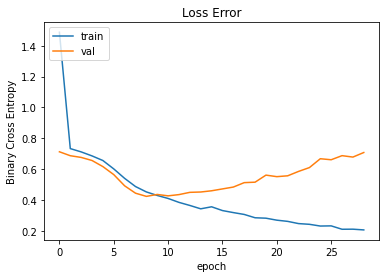

In [ ]:
model.compile(optimizer=RMSprop(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=300,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[History(), EarlyStopping(patience=20, monitor="val_loss",restore_best_weights=True)])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Error')
plt.ylabel('Binary Cross Entropy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Modelo RNN

In [ ]:
timesteps = x_train_rnn.shape[1]
features = x_train_rnn.shape[2]

inputs_features_1 = tf.keras.layers.Input(shape=(timesteps,features))

x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100))(inputs_features_1)
x = tf.keras.layers.Dense(20, activation='relu')(x)
x = tf.keras.layers.Dense(20, activation='relu')(x)
x = tf.keras.layers.Dense(20, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1)(x)

model2 = tf.keras.Model(inputs=inputs_features_1, outputs=x)
model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 25, 500)]         0         
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               480800    
_________________________________________________________________
dense_1 (Dense)              (None, 20)                4020      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21    

Epoch 1/300
200/200 [==============================] - 6s 12ms/step - loss: 5.8962 - acc: 0.5013 - val_loss: 6.3116 - val_acc: 0.5350
Epoch 2/300
200/200 [==============================] - 2s 8ms/step - loss: 5.0051 - acc: 0.5025 - val_loss: 5.4955 - val_acc: 0.5350
Epoch 3/300
200/200 [==============================] - 2s 8ms/step - loss: 4.1263 - acc: 0.5113 - val_loss: 4.5690 - val_acc: 0.5350
Epoch 4/300
200/200 [==============================] - 2s 8ms/step - loss: 3.4458 - acc: 0.5200 - val_loss: 3.1527 - val_acc: 0.5350
Epoch 5/300
200/200 [==============================] - 2s 8ms/step - loss: 2.5455 - acc: 0.5350 - val_loss: 2.0649 - val_acc: 0.5300
Epoch 6/300
200/200 [==============================] - 2s 8ms/step - loss: 2.2299 - acc: 0.5412 - val_loss: 1.6991 - val_acc: 0.5250
Epoch 7/300
200/200 [==============================] - 2s 8ms/step - loss: 1.9772 - acc: 0.5525 - val_loss: 1.3968 - val_acc: 0.4800
Epoch 8/300
200/200 [==============================] - 2s 8ms/step -

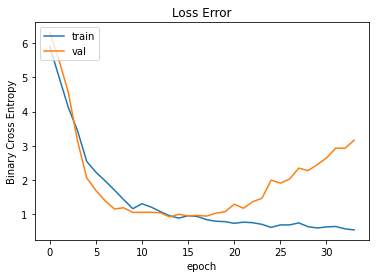

In [ ]:
model2.compile(optimizer=RMSprop(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model2.fit(x_train_rnn, y_train,
                    epochs=300,
                    batch_size=4,
                    validation_split=0.2,
                    callbacks=[History(), EarlyStopping(patience=20, monitor="val_loss",restore_best_weights=True)])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Error')
plt.ylabel('Binary Cross Entropy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Datset 2 House Pricing Prediction
Data de https://www.kaggle.com/htagholdings/property-sales

In [ ]:
df =  pd.read_csv('/content/ma_lga_12345.csv',names=['saledate','MA','tipo','bedrooms'],header=0)

In [ ]:
df

,saledate,MA,tipo,bedrooms
0,30/09/2007,441854,house,2
1,31/12/2007,441854,house,2
2,31/03/2008,441854,house,2
3,30/06/2008,441854,house,2
4,30/09/2008,451583,house,2
...,...,...,...,...
342,30/09/2018,603281,unit,3
343,31/12/2018,601167,unit,3
344,31/03/2019,605637,unit,3
345,30/06/2019,599339,unit,3


In [ ]:
df2 = df.dropna()
df['saledate'] = pd.to_datetime(df['saledate'],infer_datetime_format=True)
df['year']   = df['saledate'].apply(lambda d: d.year)
df['month']  = df['saledate'].apply(lambda d: d.month)
df['day']    = df['saledate'].apply(lambda d: d.day)
tipos = pd.get_dummies(df[['tipo']])
df[['house','unit']] = tipos

In [ ]:
del df['saledate']
del df['tipo']

In [ ]:
df

,MA,bedrooms,year,month,day,house,unit
0,441854,2,2007,9,30,1,0
1,441854,2,2007,12,31,1,0
2,441854,2,2008,3,31,1,0
3,441854,2,2008,6,30,1,0
4,451583,2,2008,9,30,1,0
...,...,...,...,...,...,...,...
342,603281,3,2018,9,30,0,1
343,601167,3,2018,12,31,0,1
344,605637,3,2019,3,31,0,1
345,599339,3,2019,6,30,0,1


In [ ]:
y_train2 = df["MA"] 
y_train2 = y_train2.values[:-2]
x_train2 = df[['year', 'month', 'day','bedrooms','house','unit']]

In [ ]:
for name in x_train2.columns:
  scaler = MinMaxScaler() 
  scaler.fit(x_train2[[name]])
  x_train2[name] = scaler.transform(x_train2[[name]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [ ]:
x_train2 = x_train2.values[0:-2]

In [ ]:
x_train2

array([[0.        , 0.66666667, 0.        , 0.25      , 1.        ,
        0.        ],
       [0.        , 1.        , 1.        , 0.25      , 1.        ,
        0.        ],
       [0.08333333, 0.        , 1.        , 0.25      , 1.        ,
        0.        ],
       ...,
       [0.91666667, 0.66666667, 0.        , 0.5       , 0.        ,
        1.        ],
       [0.91666667, 1.        , 1.        , 0.5       , 0.        ,
        1.        ],
       [1.        , 0.        , 1.        , 0.5       , 0.        ,
        1.        ]])

In [ ]:
print(x_train2.shape)
print(y_train2.shape)

(345, 6)
(345,)


In [ ]:
x_train2_rnn = x_train2.reshape(len(x_train2)//15,15,x_train2.shape[1])

In [ ]:
print(x_train2_rnn.shape)

(23, 15, 6)


### Modelo CNN

In [ ]:
input_shape = x_train2_rnn.shape
inputs = tf.keras.layers.Input(shape=input_shape[1:])

cnn2 = tf.keras.layers.Conv1D(32,3, activation='relu')(inputs)
#cnn2 = tf.keras.layers.MaxPooling1D(5)(cnn2)
cnn2 = tf.keras.layers.Conv1D(32,3, activation='relu')(cnn2)
cnn2 = tf.keras.layers.GlobalMaxPooling1D()(cnn2)
cnn2 = tf.keras.layers.Dropout(0.5)(cnn2)
cnn2 = tf.keras.layers.Dense(1)(cnn2)


model_cnn_2 = tf.keras.Model(inputs=inputs, outputs=cnn2)
model_cnn_2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 15, 6)]           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 13, 32)            608       
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 11, 32)            3104      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 3,745
Trainable params: 3,745
Non-trainable params: 0
_________________________________________________________

Epoch 1/300
20/20 [==============================] - 1s 8ms/step - loss: 205608681472.0000 - val_loss: 211666944000.0000
Epoch 2/300
20/20 [==============================] - 0s 3ms/step - loss: 205607419904.0000 - val_loss: 211665764352.0000
Epoch 3/300
20/20 [==============================] - 0s 3ms/step - loss: 205605535744.0000 - val_loss: 211663585280.0000
Epoch 4/300
20/20 [==============================] - 0s 3ms/step - loss: 205602258944.0000 - val_loss: 211659177984.0000
Epoch 5/300
20/20 [==============================] - 0s 3ms/step - loss: 205595983872.0000 - val_loss: 211651346432.0000
Epoch 6/300
20/20 [==============================] - 0s 3ms/step - loss: 205584564224.0000 - val_loss: 211637256192.0000
Epoch 7/300
20/20 [==============================] - 0s 3ms/step - loss: 205564248064.0000 - val_loss: 211613581312.0000
Epoch 8/300
20/20 [==============================] - 0s 3ms/step - loss: 205529726976.0000 - val_loss: 211575455744.0000
Epoch 9/300
20/20 [=============

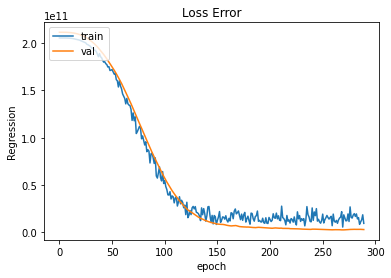

In [ ]:
model_cnn_2.compile(optimizer='adam',loss='mean_squared_error')

history = model_cnn_2.fit(x_train2_rnn, y_train2,
                    epochs=300,
                    batch_size=1,
                    validation_split=0.1,
                    callbacks=[History(), EarlyStopping(patience=20, monitor="val_loss",restore_best_weights=True)])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Error')
plt.ylabel('Regression')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Modelo RNN

In [ ]:
timesteps2 = x_train2_rnn.shape[1]
features2 = x_train2_rnn.shape[2]

inputs_features_2 = tf.keras.layers.Input(shape=(timesteps2,features2))

x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50))(inputs_features_2)
x = tf.keras.layers.Dense(20, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1,activation='linear')(x)

model_rnn2 = tf.keras.Model(inputs=inputs_features_2, outputs=x)
model_rnn2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 15, 6)]           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100)               22800     
_________________________________________________________________
dense_6 (Dense)              (None, 20)                2020      
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 21        
Total params: 24,841
Trainable params: 24,841
Non-trainable params: 0
_________________________________________________________________


Epoch 1/300
20/20 [==============================] - 3s 37ms/step - loss: 205609189376.0000 - val_loss: 211667566592.0000
Epoch 2/300
20/20 [==============================] - 0s 6ms/step - loss: 205608681472.0000 - val_loss: 211666862080.0000
Epoch 3/300
20/20 [==============================] - 0s 6ms/step - loss: 205606993920.0000 - val_loss: 211664060416.0000
Epoch 4/300
20/20 [==============================] - 0s 6ms/step - loss: 205603520512.0000 - val_loss: 211659440128.0000
Epoch 5/300
20/20 [==============================] - 0s 6ms/step - loss: 205598588928.0000 - val_loss: 211654410240.0000
Epoch 6/300
20/20 [==============================] - 0s 6ms/step - loss: 205597278208.0000 - val_loss: 211649740800.0000
Epoch 7/300
20/20 [==============================] - 0s 6ms/step - loss: 205589348352.0000 - val_loss: 211644170240.0000
Epoch 8/300
20/20 [==============================] - 0s 6ms/step - loss: 205580779520.0000 - val_loss: 211638075392.0000
Epoch 9/300
20/20 [============

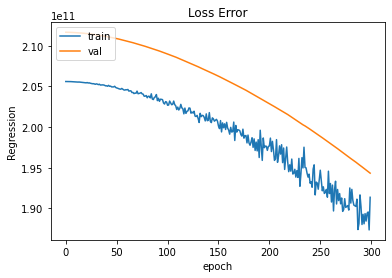

In [ ]:
model_rnn2.compile(optimizer='adam',loss='mean_squared_error')
history = model_rnn2.fit(x_train2_rnn, y_train2,
                    epochs=300,
                    batch_size=1,
                    validation_split=0.1,
                    callbacks=[History(), EarlyStopping(patience=20, monitor="val_loss",restore_best_weights=True)])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Error')
plt.ylabel('Regression')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Dataset 3 Stock Prediction
Data de https://www.kaggle.com/szrlee/stock-time-series-20050101-to-20171231, en especifico el primer .csv que sale, "ABBA"

In [ ]:
df_stock = pd.read_csv('/content/AABA_2006-01-01_to_2018-01-01.csv')

In [ ]:
df_stock

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
1,2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2,2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
3,2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
4,2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA
...,...,...,...,...,...,...,...
3014,2017-12-22,71.42,71.87,71.22,71.58,10979165,AABA
3015,2017-12-26,70.94,71.39,69.63,69.86,8542802,AABA
3016,2017-12-27,69.77,70.49,69.69,70.06,6345124,AABA
3017,2017-12-28,70.12,70.32,69.51,69.82,7556877,AABA


In [ ]:
df_stock = df_stock.dropna()
df_stock['Date'] = pd.to_datetime(df_stock['Date'],infer_datetime_format=True)
df_stock['year']   = df_stock['Date'].apply(lambda d: d.year)
df_stock['month']  = df_stock['Date'].apply(lambda d: d.month)
df_stock['day']    = df_stock['Date'].apply(lambda d: d.day)


In [ ]:
del df_stock['Date']
del df_stock['Name']

In [ ]:
df_stock

,Open,High,Low,Close,Volume,year,month,day
0,39.69,41.22,38.79,40.91,24232729,2006,1,3
1,41.22,41.90,40.77,40.97,20553479,2006,1,4
2,40.93,41.73,40.85,41.53,12829610,2006,1,5
3,42.88,43.57,42.80,43.21,29422828,2006,1,6
4,43.10,43.66,42.82,43.42,16268338,2006,1,9
...,...,...,...,...,...,...,...,...
3014,71.42,71.87,71.22,71.58,10979165,2017,12,22
3015,70.94,71.39,69.63,69.86,8542802,2017,12,26
3016,69.77,70.49,69.69,70.06,6345124,2017,12,27
3017,70.12,70.32,69.51,69.82,7556877,2017,12,28


In [ ]:
y_train3 = df_stock["Close"] 
y_train3 = y_train3.values[:-19]
x_train3 = df_stock[['Open', 'High', 'Low','Volume','year','month','day']]

In [ ]:
for name in x_train3.columns:
  scaler = MinMaxScaler() 
  scaler.fit(x_train3[[name]])
  x_train3[name] = scaler.transform(x_train3[[name]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [ ]:
x_train3 = x_train3.values[:-19]

In [ ]:
print(x_train3.shape)
print(y_train3.shape)

(3000, 7)
(3000,)


In [ ]:
x_train3

array([[0.47856696, 0.4977262 , 0.46993073, ..., 0.        , 0.        ,
        0.06666667],
       [0.50250313, 0.50838952, 0.50110202, ..., 0.        , 0.        ,
        0.1       ],
       [0.49796621, 0.50572369, 0.50236146, ..., 0.        , 0.        ,
        0.13333333],
       ...,
       [0.97794118, 0.9756939 , 0.93781486, ..., 1.        , 0.90909091,
        0.93333333],
       [0.95760325, 0.96220793, 0.9513539 , ..., 1.        , 0.90909091,
        0.96666667],
       [0.94962453, 0.96863729, 0.95292821, ..., 1.        , 1.        ,
        0.        ]])

In [ ]:
x_train3_rnn = x_train3.reshape(len(x_train3)//15,15,x_train3.shape[1])

In [ ]:
print(x_train3_rnn.shape)

(200, 15, 7)


### Modelo CNN

In [ ]:
input_shape3 = x_train3_rnn.shape
inputs3 = tf.keras.layers.Input(shape=input_shape3[1:])

cnn3 = tf.keras.layers.Conv1D(32,3, activation='relu')(inputs3)
#cnn3 = tf.keras.layers.MaxPooling1D(5)(cnn3)
cnn3 = tf.keras.layers.Conv1D(32,3, activation='relu')(cnn3)
cnn3 = tf.keras.layers.GlobalMaxPooling1D()(cnn3)
cnn3 = tf.keras.layers.Dropout(0.5)(cnn3)
cnn3 = tf.keras.layers.Dense(1)(cnn3)


model_cnn_3 = tf.keras.Model(inputs=inputs3, outputs=cnn3)
model_cnn_3.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 15, 7)]           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 13, 32)            704       
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 11, 32)            3104      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 32)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 3,841
Trainable params: 3,841
Non-trainable params: 0
_________________________________________________________

Epoch 1/300
180/180 [==============================] - 1s 3ms/step - loss: 634.3073 - val_loss: 389.2445
Epoch 2/300
180/180 [==============================] - 0s 2ms/step - loss: 148.0689 - val_loss: 257.8294
Epoch 3/300
180/180 [==============================] - 0s 2ms/step - loss: 144.7204 - val_loss: 309.4091
Epoch 4/300
180/180 [==============================] - 0s 2ms/step - loss: 123.7709 - val_loss: 112.8481
Epoch 5/300
180/180 [==============================] - 0s 2ms/step - loss: 111.7350 - val_loss: 61.0470
Epoch 6/300
180/180 [==============================] - 0s 2ms/step - loss: 77.9697 - val_loss: 126.1040
Epoch 7/300
180/180 [==============================] - 0s 2ms/step - loss: 119.2464 - val_loss: 45.1535
Epoch 8/300
180/180 [==============================] - 0s 2ms/step - loss: 122.3151 - val_loss: 48.1394
Epoch 9/300
180/180 [==============================] - 0s 3ms/step - loss: 83.6133 - val_loss: 14.3947
Epoch 10/300
180/180 [==============================] - 0s 2m

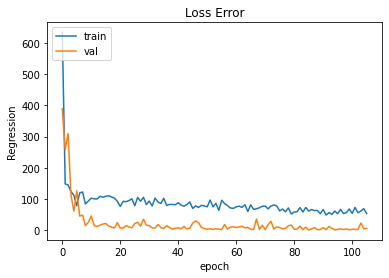

In [ ]:
model_cnn_3.compile(optimizer='adam',loss='mean_squared_error')

history = model_cnn_3.fit(x_train3_rnn, y_train3,
                    epochs=300,
                    batch_size=1,
                    validation_split=0.1,
                    callbacks=[History(), EarlyStopping(patience=20, monitor="val_loss",restore_best_weights=True)])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Error')
plt.ylabel('Regression')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Modelo RNN 

In [ ]:
timesteps3 = x_train3_rnn.shape[1]
features3 = x_train3_rnn.shape[2]

inputs_features_3 = tf.keras.layers.Input(shape=(timesteps3,features3))

x3 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50))(inputs_features_3)
x3 = tf.keras.layers.Dense(20, activation='relu')(x3)
x3 = tf.keras.layers.Dropout(0.5)(x3)
x3 = tf.keras.layers.Dense(1,activation='linear')(x3)

model_rnn3 = tf.keras.Model(inputs=inputs_features_3, outputs=x3)
model_rnn3.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 15, 7)]           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100)               23200     
_________________________________________________________________
dense_9 (Dense)              (None, 20)                2020      
_________________________________________________________________
dropout_5 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 21        
Total params: 25,241
Trainable params: 25,241
Non-trainable params: 0
_________________________________________________________________


Epoch 1/300
180/180 [==============================] - 4s 9ms/step - loss: 504.2174 - val_loss: 0.3088
Epoch 2/300
180/180 [==============================] - 1s 5ms/step - loss: 178.0520 - val_loss: 5.0849
Epoch 3/300
180/180 [==============================] - 1s 5ms/step - loss: 130.9646 - val_loss: 2.9198
Epoch 4/300
180/180 [==============================] - 1s 5ms/step - loss: 178.5398 - val_loss: 3.5063
Epoch 5/300
180/180 [==============================] - 1s 5ms/step - loss: 162.1192 - val_loss: 7.7518
Epoch 6/300
180/180 [==============================] - 1s 5ms/step - loss: 158.5634 - val_loss: 5.4739
Epoch 7/300
180/180 [==============================] - 1s 5ms/step - loss: 159.8095 - val_loss: 4.2995
Epoch 8/300
180/180 [==============================] - 1s 5ms/step - loss: 138.5165 - val_loss: 4.8082
Epoch 9/300
180/180 [==============================] - 1s 5ms/step - loss: 161.0423 - val_loss: 2.5077
Epoch 10/300
180/180 [==============================] - 1s 5ms/step - los

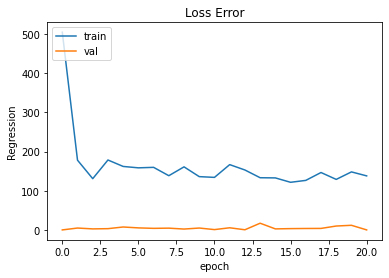

In [ ]:
model_rnn3.compile(optimizer='adam',loss='mean_squared_error')
history = model_rnn3.fit(x_train3_rnn, y_train3,
                    epochs=300,
                    batch_size=1,
                    validation_split=0.1,
                    callbacks=[History(), EarlyStopping(patience=20, monitor="val_loss",restore_best_weights=True)])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Error')
plt.ylabel('Regression')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Conclusiones: 
como se puede observar en los graficos de las Losses de los modelos, tanto como para el primer, segundo y tercer dataset el modelo convolucional funciona mejor que el modelo recurrente, esto nos sorprendio ya que es bastante contra-intuitivo, uno pensaria que siempre el modelo recurrente funcionara mejor que uno convolucional 1D para secuencias, pero no fue asi, quizas con algun dataset mas especifico donde solo hayan secuencias temporales como el del desafio kaggle el modelo recurrente de mejores resultados pero con estos datsets, tanto de sentiment classification, house prediction y stock value prediction influyen mas los datos por si solos que datos de secuencias anteriores. 

Por esta razon es que refutamos la pregunta de investigacion "No tiene sentido usar una red convolucional para aprendizaje de secuencias, su error será siempre mayor que el de una red recurrente.", si tiene sentido utilzar una red convolucional para aprendizaje de secuencias ya que existen variados casos donde da mejores resultados que utilizar una red recurrente.

# Desafio Kaggle
## Pronóstico de la velocidad del viento.

En esta sección trabajaremos con datos nacionales. El objetivo de este desafío es pronosticar la velocidad promedio a 20 metros de altura a diferentes instantes de tiempo.


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Wind_turbines_in_southern_California_2016.jpg/660px-Wind_turbines_in_southern_California_2016.jpg" title="Title text" width="30%" />



El dataset contiene la velocidad media del viento a 20 metros de altura para cada instante de tiempo determinado. El conjunto de entrenamiento contiene 123365 registros cada 10 minutos de la velocidad media del viento desde el 19 de Diciembre de 2012 a las 00:10 hasta el 24 de Abril de 2015 a las 23:50.
El conjunto de set consta de 2000 registros a instantes de tiempos seleccionados entre el 26 de Abril y el 24 de Septiembre de 2015.

La efectividad del modelo se determinará comparando las predicciones para el conjunto de pruebas con los valores reales vía RMSE.

La competencia Kaggle es:

https://www.kaggle.com/c/prediccin-velocidad-del-viento/

Los datos para comenzar a trabajar se encuentran en dicha competencia, y también en:

http://www.inf.utfsm.cl/~cvalle/Winspeed.rar

Pueden también descargar los datos directamente a la máquina donde estén ejecutando el código con los siguientes comandos



 

In [ ]:
!wget  http://www.inf.utfsm.cl/~cvalle/Windspeed.rar
!unrar e /content/Windspeed.rar

URL transformed to HTTPS due to an HSTS policy
--2021-08-12 22:54:04--  https://www.inf.utfsm.cl/~cvalle/Windspeed.rar
Resolving www.inf.utfsm.cl (www.inf.utfsm.cl)... 200.1.19.11, 2800:270:c::11
Connecting to www.inf.utfsm.cl (www.inf.utfsm.cl)|200.1.19.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428435 (418K) [application/x-rar-compressed]
Saving to: ‘Windspeed.rar.1’

Windspeed.rar.1     100%[===================>] 418.39K   894KB/s    in 0.5s    

2021-08-12 22:54:05 (894 KB/s) - ‘Windspeed.rar.1’ saved [428435/428435]


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/Windspeed.rar


Would you like to replace the existing file windspeed-training.csv
2730380 bytes, modified on 2021-07-15 20:48
with a new one
2730380 bytes, modified on 2021-07-15 20:48

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit 
User break

User break


### Predicciones

Las predicciones de cada equipo para el conjunto de test deben ser subidas a la página de la competencia en Kaggle. 

En caso de entrenar los modelos con información extra o derivada del conjunto de entrenamiento original, se deben adjuntar éstos datos, de manera que el código entregado en el notebook de la tarea pueda ser reproducido.

El puntaje obtenido en esta parte dependerá del ranking obtenido en la competencia (50%) y del score del modelo (50%. Para asignar el puntaje obtenido por score, se comparará el RMSE de vuestro modelo con las predicciones con la misma métrica en una red muy básica.

In [ ]:
def rmse(y_pred, y_true):
  return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [ ]:
data_train = pd.read_csv('/content/windspeed-training.csv')
data_test = pd.read_csv('/content/windspeed-testing.csv', names=["date"])

In [ ]:
data_train.rename(columns={"'Fecha'": "date", "'Velocidad de viento en 20.0 metros [mean]'": 'speed'}, inplace=True)
data_train['date'] = pd.to_datetime(data_train["date"], format="%Y-%m-%d %H:%M")
data_test['date'] = pd.to_datetime(data_test["date"], format="%d-%m-%Y %H:%M")

data_train['year']   = data_train['date'].apply(lambda d: d.year)
data_train['month']  = data_train['date'].apply(lambda d: d.month)
data_train['day']    = data_train['date'].apply(lambda d: d.day)
data_train['hour']   = data_train['date'].apply(lambda d: d.hour)
data_train['minute'] = data_train['date'].apply(lambda d: d.minute)

data_test['year']   = data_test['date'].apply(lambda d: d.year)
data_test['month']  = data_test['date'].apply(lambda d: d.month)
data_test['day']    = data_test['date'].apply(lambda d: d.day)
data_test['hour']   = data_test['date'].apply(lambda d: d.hour)
data_test['minute'] = data_test['date'].apply(lambda d: d.minute)

In [ ]:
data_train.head()

,date,speed,year,month,day,hour,minute
0,2012-12-19 00:10:00,12.4,2012,12,19,0,10
1,2012-12-19 00:20:00,11.4,2012,12,19,0,20
2,2012-12-19 00:30:00,11.8,2012,12,19,0,30
3,2012-12-19 00:40:00,11.6,2012,12,19,0,40
4,2012-12-19 00:50:00,11.0,2012,12,19,0,50


In [ ]:
data_test.head()

,date,year,month,day,hour,minute
0,2015-04-26 01:50:00,2015,4,26,1,50
1,2015-04-26 03:10:00,2015,4,26,3,10
2,2015-04-26 04:20:00,2015,4,26,4,20
3,2015-04-26 05:20:00,2015,4,26,5,20
4,2015-04-26 06:40:00,2015,4,26,6,40


In [ ]:
# Normalizamos la data
data_train['month']  = (data_train['month'] - 1)/ 11
data_train['day']    = (data_train['day'] - 1)/ 30
data_train['hour']   = data_train['hour'] / 23
data_train['minute'] = data_train['minute'] / 59

data_test['month']  = (data_test['month'] - 1)/ 11
data_test['day']    = (data_test['day'] - 1)/ 30
data_test['hour']   = data_test['hour'] / 23
data_test['minute'] = data_test['minute'] / 59

In [ ]:
data_train.head()

,date,speed,year,month,day,hour,minute
0,2012-12-19 00:10:00,12.4,2012,1.0,0.6,0.0,0.169492
1,2012-12-19 00:20:00,11.4,2012,1.0,0.6,0.0,0.338983
2,2012-12-19 00:30:00,11.8,2012,1.0,0.6,0.0,0.508475
3,2012-12-19 00:40:00,11.6,2012,1.0,0.6,0.0,0.677966
4,2012-12-19 00:50:00,11.0,2012,1.0,0.6,0.0,0.847458


In [ ]:
data_test.head()

,date,year,month,day,hour,minute
0,2015-04-26 01:50:00,2015,0.272727,0.833333,0.043478,0.847458
1,2015-04-26 03:10:00,2015,0.272727,0.833333,0.130435,0.169492
2,2015-04-26 04:20:00,2015,0.272727,0.833333,0.173913,0.338983
3,2015-04-26 05:20:00,2015,0.272727,0.833333,0.217391,0.338983
4,2015-04-26 06:40:00,2015,0.272727,0.833333,0.260870,0.677966


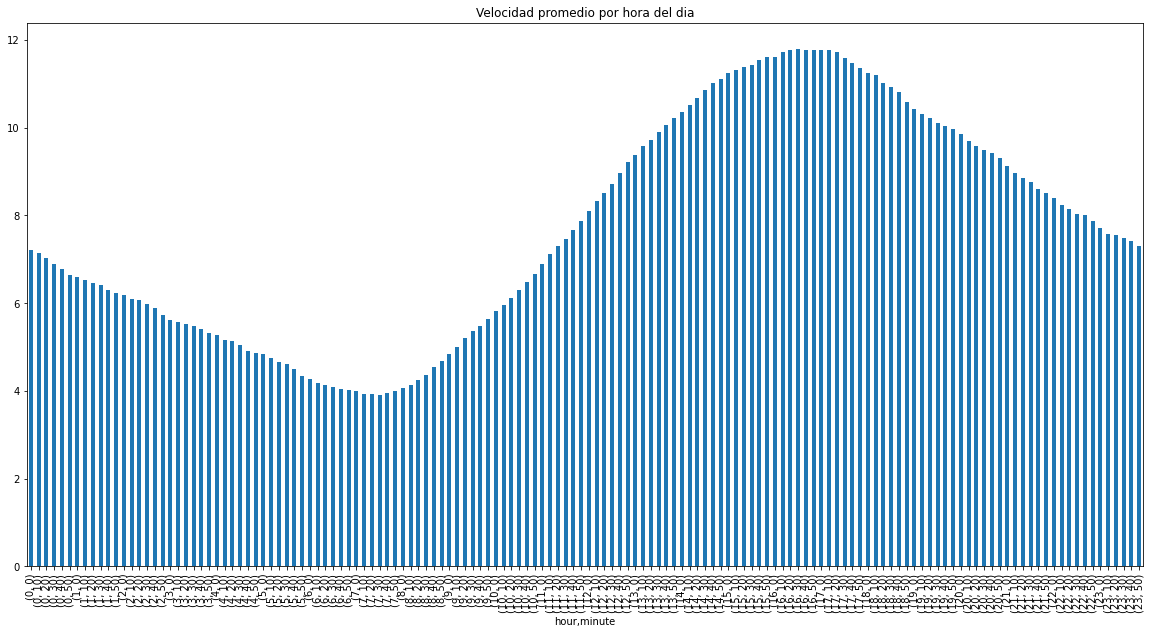

In [ ]:
# Visualizamos la data

_data = data_train.groupby(['hour', 'minute'])['speed'].mean()
_data.plot.bar(title='Velocidad promedio por hora del dia', figsize=(20,10))

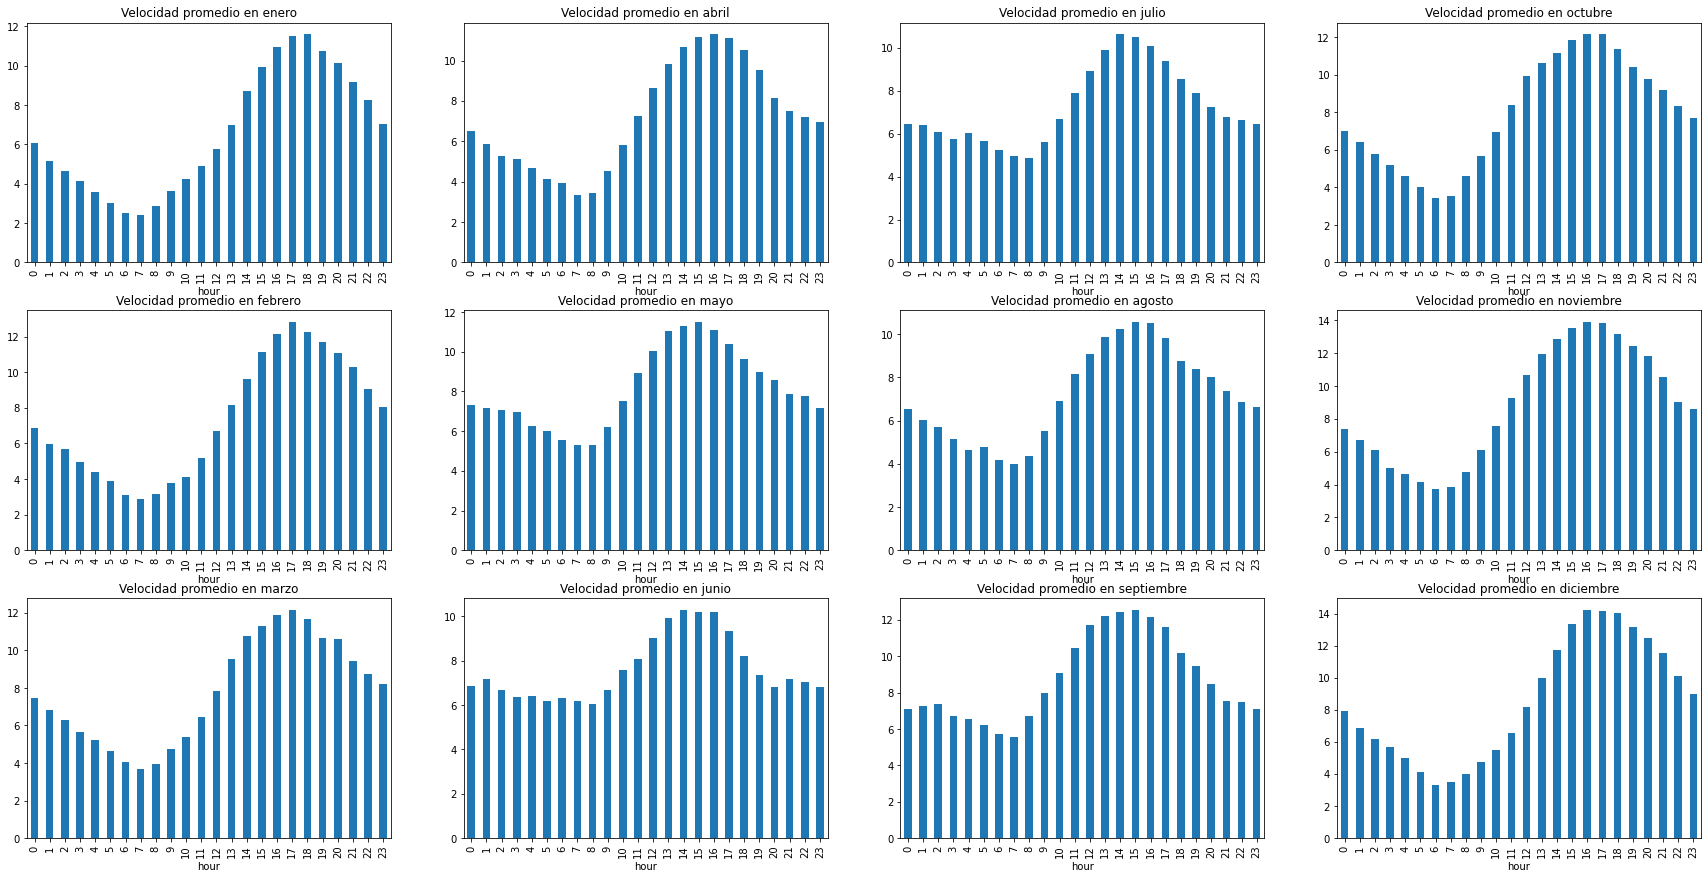

In [ ]:
months = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio',
          'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']

fig, axs = plt.subplots(3, 4, figsize=(30,15))

for i in range(12):
  _data = data_train[data_train['month'] == i + 1].groupby('hour')['speed'].mean()
  _title = 'Velocidad promedio en {0}'.format(months[i])
  _data.plot.bar(title=_title, ax=axs[i % 3, i // 3])

In [ ]:
# definimos algunas constantes para la red y el entrenamiento

TIMESTEPS = 72 # Monitoreamos por medio dia
FEATURE_LIST = ['month','day', 'hour', 'minute']
FEATURES = len(FEATURE_LIST)

In [ ]:
# Preparamos los datos del train set

seq = deque([[-1 for _ in range(FEATURES)] for _ in range(TIMESTEPS)], maxlen=TIMESTEPS)
y_train = data_train[['speed']].values
_x_train = data_train[FEATURE_LIST].values
x_train = []

for i in range(len(data_train)):
  # removemos un cierto porcentaje de los datos para que tenga saltos temporales
  # similar al test set
  if random() < 0.3:
    seq.append(_x_train[i])
  else:
    seq.append([-1 for _ in range(FEATURES)])
  x_train.append([i for i in seq])

x_train = np.array(x_train)

In [ ]:
# 5% de la data la dejamos de validación
val_mask = x_train.shape[0] // 20 
x_val = x_train[-val_mask:]
y_val = y_train[-val_mask:]
x_train = x_train[:-val_mask]
y_train = y_train[:-val_mask]

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(117196, 72, 4)
(117196, 1)
(6168, 72, 4)
(6168, 1)


In [ ]:
# Preparamos los datos del test set
data_test['next_date']= data_test['date'].shift(-1)
data_test['time_diff'] = data_test['next_date'] - data_test['date']
data_test.head()

,date,year,month,day,hour,minute,next_date,time_diff
0,2015-04-26 01:50:00,2015,0.272727,0.833333,0.043478,0.847458,2015-04-26 03:10:00,0 days 01:20:00
1,2015-04-26 03:10:00,2015,0.272727,0.833333,0.130435,0.169492,2015-04-26 04:20:00,0 days 01:10:00
2,2015-04-26 04:20:00,2015,0.272727,0.833333,0.173913,0.338983,2015-04-26 05:20:00,0 days 01:00:00
3,2015-04-26 05:20:00,2015,0.272727,0.833333,0.217391,0.338983,2015-04-26 06:40:00,0 days 01:20:00
4,2015-04-26 06:40:00,2015,0.272727,0.833333,0.260870,0.677966,2015-04-26 10:30:00,0 days 03:50:00


In [ ]:
x_test = []
_x_test = data_test[FEATURE_LIST].values
seq = deque([[-1 for _ in range(FEATURES)] for _ in range(TIMESTEPS)], maxlen=TIMESTEPS)
for i in range(data_test.shape[0]):
  seq.append(_x_test[i])
  x_test.append([i for i in seq])
  dt = data_test['time_diff'][i]
  while dt > timedelta(minutes=10):
    dt -= timedelta(minutes=10)
    seq.append([-1 for _ in range(FEATURES)])

x_test = np.array(x_test)
x_test.shape

(2000, 72, 4)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 72, 4)             0         
_________________________________________________________________
gru (GRU)                    (None, 72, 64)            13440     
_________________________________________________________________
dropout_6 (Dropout)          (None, 72, 64)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 72, 64)            24960     
_________________________________________________________________
dropout_7 (Dropout)          (None, 72, 64)            0         
_________________________________________________________________
gru_2 (GRU)                  (None, 72, 64)            24960     
_________________________________________________________________
dropout_8 (Dropout)          (None, 72, 64)           

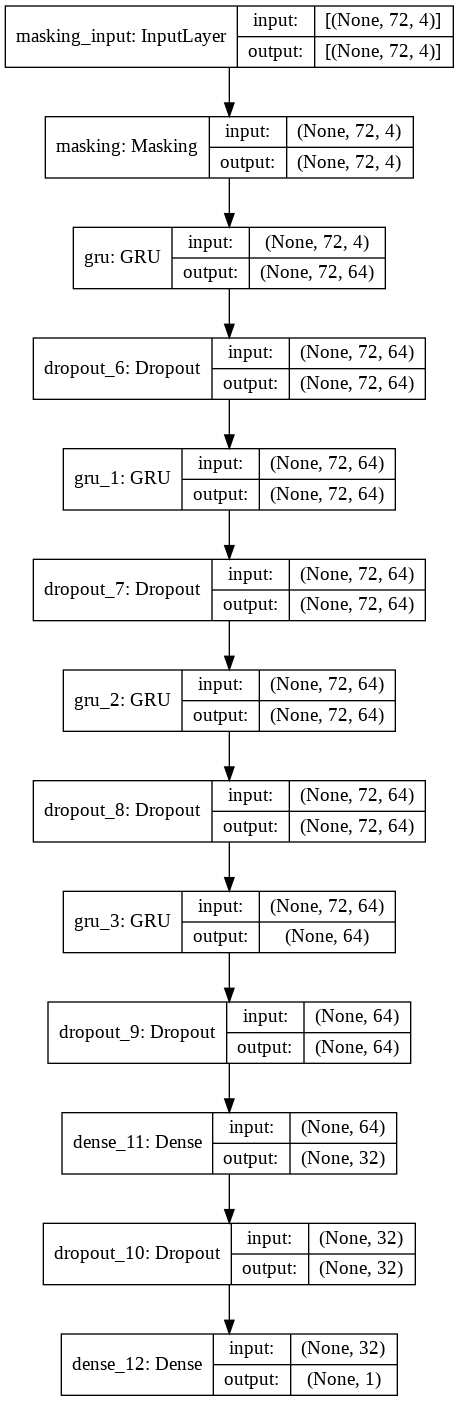

In [ ]:
# definimos el modelo

model = Sequential()
model.add(Masking(mask_value=-1, input_shape=(TIMESTEPS, FEATURES)))
model.add(GRU(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.summary()
keras.utils.plot_model(model=model, show_shapes=True)

In [ ]:
opt = keras.optimizers.Adam(learning_rate=1e-3, decay=1e-5)
model.compile(optimizer=opt, loss=rmse, metrics=['accuracy'])

In [ ]:
callbacks = [History()]
history = model.fit(x=x_train,
                    y=y_train,
                    batch_size=x_train.shape[0] // 10,
                    epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=callbacks)

Epoch 1/60
11/11 [==============================] - 25s 1s/step - loss: 8.4244 - accuracy: 0.0037 - val_loss: 5.4421 - val_accuracy: 0.0112
Epoch 2/60
11/11 [==============================] - 10s 923ms/step - loss: 5.3924 - accuracy: 0.0083 - val_loss: 4.3534 - val_accuracy: 0.0112
Epoch 3/60
11/11 [==============================] - 10s 950ms/step - loss: 4.7107 - accuracy: 0.0083 - val_loss: 4.3319 - val_accuracy: 0.0112
Epoch 4/60
11/11 [==============================] - 10s 953ms/step - loss: 4.6835 - accuracy: 0.0083 - val_loss: 4.1886 - val_accuracy: 0.0112
Epoch 5/60
11/11 [==============================] - 10s 949ms/step - loss: 4.6613 - accuracy: 0.0083 - val_loss: 4.2584 - val_accuracy: 0.0112
Epoch 6/60
11/11 [==============================] - 10s 926ms/step - loss: 4.6624 - accuracy: 0.0083 - val_loss: 4.2427 - val_accuracy: 0.0112
Epoch 7/60
11/11 [==============================] - 11s 956ms/step - loss: 4.6556 - accuracy: 0.0083 - val_loss: 4.2264 - val_accuracy: 0.0112
Ep

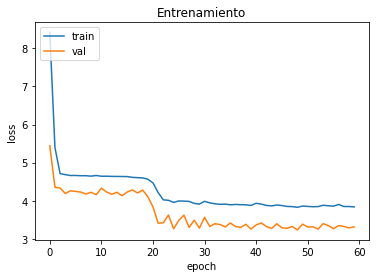

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Entrenamiento')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# realizamos la prediccion

y_pred = model.predict(x_test)
y_pred

array([[1.2201682],
       [2.7680147],
       [4.282553 ],
       ...,
       [1.3011434],
       [1.3838782],
       [2.9043067]], dtype=float32)

In [ ]:
f = open("submit.csv", "w")
f.write("'Fecha','Velocidad de viento en 20.0 metros [mean]'\n")
for i in range(data_test.shape[0]):
  datestr = data_test['date'][i].strftime("%d-%m-%Y %H:%M")
  f.write(f"{datestr},{y_pred[i][0]}\n")
f.close()